<a href="https://colab.research.google.com/github/YusunPark/DeepLearning/blob/main/4_1%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀
p174

- 분류모델은 예측뿐만 아니라 예측의 근거가 되는 확률을 출력 할 수 있다. `predict_proba`

- k최근접은 주변의 이웃으로 예측하기에 정해진 확률로만 제공 -> 로지스틱 이용(대표적 분류 알고리즘)

1. 이진 분류
  - 하나의 선형 방정식을 훈련
  - 이 방정식의 출력값 z를 `시그모이드 함수`에 통과시켜 0~1사이로 변환
    - 이 값은 양성 클래스에 대한 확률
    - 음성클래스는 1- 양성클래스 
2. 다중 분류
  - 클래스 개수만큼 방정식 훈련
  - 각 방정식의 출력값 z를 `소프트맥스 함수`를 통과시켜 전체 클래스의 합이 1이 되도록 조정

## 럭키백의 확률

- 럭키백 : 구성품을 모른 채 먼저 구매하고， 배송받은 다음에야 비로소 구성품을 알 수 있는 상품 

- 모델 조건 
  - 럭키백에 들어갈 수 있는 생선의 종류 = 7
  - 럭키백에 들어간 생선의 크기, 무게가 주어졌을때 => 7개 생선에 대한 확률을 출력해야한다.
  - 특성 : 길이, 높이, 두께, 대각선 길이, 무게

### 데이터 준비하기

1. 데이터 로딩
2. 데이터 확인 (head, unique)
3. input과 target으로 나누기
4. train / test로 나누기
5. 데이터 스케일링 진행

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# 데이터를 분리하는 작업

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

print(fish_input[:5])
print(fish_target[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [4]:
# train, test 세트 분리

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

해당 알고리즘으로 했을때, train = 0.89, test = 0.85으로 둘다 높은 점수가 아니다.

- 타겟 데이터에 클래스가 7개가 있었다 (생선종류 7) 이러한 것을 다중 분류라고 한다.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [7]:
# KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [8]:
print(test_scaled[:5])

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [9]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [10]:
# predict-proba() : 클래스별 확률값을 반환 
# 메서드의 출력 순서는 앞서 보았던 classes 속성과 같다.
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [11]:
# 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인과정

distances, indexs = kn.kneighbors(test_scaled[3:4])
print(train_target[indexs])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀
p181

- 이름은 회귀이지만, 분류 모델

- 시그모이드 함수를 이용해서 그래프를 그릴 수 있다.

#### 활성화 함수
- 딥러닝 네트워크에서는 노드에 들어오는 값들에 대해 곧바로 다음 레이어로 전달하지 않고, 주로 `비선형 함수`를 통과시킨 후 전달한다.
- 이때 사용하는 함수를 활성화 함수라고 한다.


- 활성화 함수의 종류
  - Sigmoid 함수
    - 0~1 사이의 값, 중간값 = 1/2
    - 신경망 초기에는 사용되었으나 최근은 거의 사용 x
    - 단점: Gradient Vanishing (input값 일정이상시 미분값 0으로 수렴)
    - 단점2 : 함수의 중간값이 0이 아님 (학습이 느려짐)
    - exp함수 사용시 비용 큼
  - 하이퍼볼릭탄젠트 함수
    - -1~1 사이의 값, 중간값 = 0
    - 시그모이드 함수를 transformation 해서 얻음
      - 단점 : Gradient Vanishing 은 여전히 남음
  
  - 렐루 함수
    - 최근 가장 많이 사용하는 함수
    - x>0 => 기울기 1, x<0 => 0
    - 시그모이드, tanh 에 비해 빠른 학습속도
    - 연산비용 낮고, 구현 간단.
    - 단점 : x<0 값들에 대해서 기울기가 0이기에 뉴런이 죽을 수 있다.
  - Leakly ReLU
    - 렐루의 뉴런이 죽는 현상 (Dying ReLU)현상 해결
    - 음수의 x값에 대해 미분값이 0이 아니라는 사실 제외하면 렐루와 같음
  - PReLU
    - Leakly와 비슷, 그러나 새로운 파라미터 a(알파) 추가하여 x<0 에서 기울기를 학습할 수 있다.
  - Exponential Linear Unit(ELU)
    - 비교적 최근에 나온 함수 
    - 렐루의 장점 포함, Dying ReLU 해결
    - 출력값이 거의 zero-centered 가까움
    - exp 함수를 계산하는 비용이 듬
  - Maxout 함수
    - 렐루의 장점 포함, Dying ReLU 해결
    - 계산량이 복잡




- 우선 가장 많이 사용되는 함수는 ReLU이다. 
- 간단하고 사용이 쉽기 때문에 우선적으로 
- ReLU를 사용한다.
- ReLU를 사용한 이후 Leakly ReLU등 ReLU계열의 
- 다른 함수도 사용 해본다.
- sigmoid의 경우에는 사용하지 않도록 한다.
- tanh의 경우도 큰 성능은 나오지 않는다.

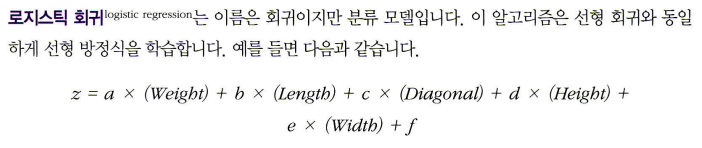

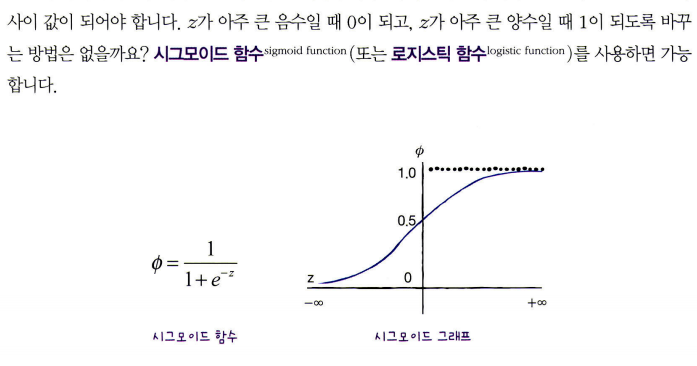

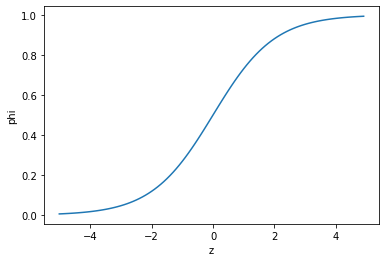

In [13]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [14]:
# 넘파일 배열의 boolean indexing 

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [15]:
# 도미(Bream) 빙어(Smelt) 행만 골라내기.

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [17]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [18]:
# 모델 훈련하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# 처음 5개 샘플의 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [22]:
# [0(음성 클래스), 1(양성 클래스)]
# 샘플들의 예측확률

print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [23]:
# 로지스틱 회귀가 학습한 계수
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


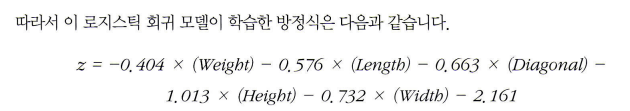

In [24]:
# 처음 5개의 샘플의 z값 출력
# z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [25]:
# expit : scipy의 시그모이드 함수, np.exp()계산시보다 편리하고 안전함
# 출력된 값은 predict_proba()의 2번째 열 값과 동일하다. 
#          -> decision_function은 양성클래스의 z값을 반환

from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기


LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용합니다. 

---

`max_iter`: 반복 횟수를 지정하며 기본값 = 100 <br>
`alpha` : LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제 (= L2규제)<br>

릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절 alpha가 커지면 규제도 커짐. LogisticRegression에서 규제를 제어하는 매개변수는 C입니다. 하지만 alpha와 반대로 작을수록 규제가 커집니다

In [26]:
# 훈련/테스트 세트의 점수가 높고, 과소/과대 적합이 아닌 것 같음

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [27]:
# 테스트 세트 처음 5개에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [31]:
# 예측 확률 출력
print(lr.classes_, '\n')
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [33]:
# 다중분류의 선형 방정식 확인

print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


다중분류는 클래스마다 z값을 하나씩 계산. -> 그 중 가장 높은 값을 출력하는것이 예측 클래스로 선정한다.

소프트맥스 함수를 이용해서 7개의 z값을 확률로 변경
  - 소프트맥스 :  여러개의 선형 방정식의 출력값을 0~1 사이로 압축 -> 합이 1이 되도록함

In [37]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [38]:
# decision_function()의 값을 소프트 맥스로 확률 변경
# axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산함.
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
